In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from glob import glob
import os

In [2]:
import tensorflow as tf
import numpy as np

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
tf.__version__

'1.5.0'

In [4]:
image_path = "00003102d3ec9a46cb5cd2fd95473b8d.jpg"

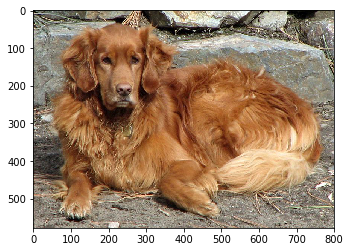

In [5]:
from PIL import Image
plt.imshow(Image.open(image_path))

In [6]:
ResNet50 = tf.keras.applications.ResNet50
preprocess_input = tf.keras.applications.resnet50.preprocess_input
image = tf.keras.preprocessing.image

In [7]:
resnet_model = ResNet50(weights='imagenet', include_top=False)

94658560/94653016 [==============================]94658560/94653016 [==============================] - 10s 0us/step

94666752/94653016 [==============================]94666752/94653016 [==============================] - 10s 0us/step



In [8]:
def extract_features(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return resnet_model.predict(x)[0][0][0]

In [9]:
f = extract_features(image_path)
print(f[:5])
print(len(f))

[0.03233027 0.05817426 0.3720164  0.         0.        ]
2048


In [10]:
size = 256

In [11]:
small_out = image.load_img(image_path, target_size=(size, size))

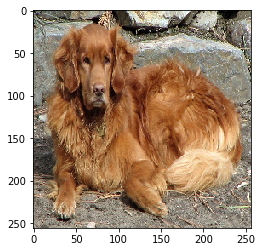

In [12]:
plt.imshow(small_out)

In [13]:
Input = tf.keras.layers.Input
Dense = tf.keras.layers.Dense
Conv2D = tf.keras.layers.Conv2D
MaxPooling2D = tf.keras.layers.MaxPooling2D
UpSampling2D = tf.keras.layers.UpSampling2D
Cropping2D = tf.keras.layers.Cropping2D
Conv2DTranspose = tf.keras.layers.Conv2DTranspose
BatchNormalization = tf.keras.layers.BatchNormalization
Model = tf.keras.models.Model
Reshape = tf.keras.layers.Reshape
#from tf.keras import backend as K

In [14]:
input_img = Input(shape=(2048, ))  # adapt this if using `channels_first` image data format

x = Reshape([4, 4, 128] )(input_img)
#x = Conv2DTranspose(2048, (4, 4), activation='relu', padding='same', strides=(2, 2))(x)
#x = Cropping2D(((1, 1), (1, 1)))(x)
#x = BatchNormalization()(x)
x = Conv2D(2048, (4, 4), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
#x = Conv2DTranspose(1024, (4, 4), activation='relu', padding='same', strides=(2, 2))(x)
#x = Cropping2D(((1, 1), (1, 1)))(x)
#x = BatchNormalization()(x)
x = Conv2D(1024, (4, 4), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
#x = Conv2DTranspose(512, (4, 4), activation='relu', padding='same', strides=(2, 2))(x)
#x = Cropping2D(((1, 1), (1, 1)))(x)
#x = BatchNormalization()(x)
x = Conv2D(512, (4, 4), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
#x = Conv2DTranspose(256, (4, 4), activation='relu', padding='same', strides=(2, 2))(x)
#x = Cropping2D(((1, 1), (1, 1)))(x)
#x = BatchNormalization()(x)
#x = Conv2D(256, (4, 4), activation='relu', padding='same')(x)
#x = UpSampling2D((2, 2))(x)
x = Conv2DTranspose(128, (4, 4), activation='relu', padding='same', strides=(2, 2))(x)
#x = Cropping2D(((1, 1), (1, 1)))(x)
#x = BatchNormalization()(x)
#x = Conv2D(128, (4, 4), activation='relu', padding='same')(x)
#x = UpSampling2D((2, 2))(x)
x = Conv2DTranspose(64, (4, 4), activation='relu', padding='same', strides=(2, 2))(x)
#x = Cropping2D(((1, 1), (1, 1)))(x)
#x = BatchNormalization()(x)
x = Conv2D(64, (4, 4), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

In [15]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [16]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 2048)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 4, 2048)        4196352   
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 8, 8, 2048)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 1024)        33555456  
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 16, 16, 1024)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 512)       8389120   
__________

In [18]:
TensorBoard = tf.keras.callbacks.TensorBoard

autoencoder.fit(np.array([f[:2048]]), 
                #np.array([np.expand_dims(image.img_to_array(small_out), axis=0)]),
                np.reshape([image.img_to_array(small_out)], (1, size, size, 3)).astype('float32') / 255.,
                epochs=5000,
               )
                #batch_size=128,
                #shuffle=True,
                #validation_data=(x_test, x_test),
                #callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Epoch 1/5000
1/1 [==============================]1/1 [==============================] - 0s 125ms/step - loss: 0.6292

Epoch 2/5000
1/1 [==============================]1/1 [==============================] - 0s 129ms/step - loss: 0.6281

Epoch 3/5000
1/1 [==============================]1/1 [==============================] - 0s 120ms/step - loss: 0.6297

Epoch 4/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.6290

Epoch 5/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.6311

Epoch 6/5000
1/1 [==============================]1/1 [==============================] - 0s 119ms/step - loss: 0.6305

Epoch 7/5000
1/1 [==============================]1/1 [==============================] - 0s 125ms/step - loss: 0.6313

Epoch 8/5000
1/1 [==============================]1/1 [==============================] - 0s 119ms/step - loss: 0.6299

Epoch 9/5000
1/1 [==============================]1/1 [==


Epoch 70/5000
1/1 [==============================]1/1 [==============================] - 0s 127ms/step - loss: 0.6244

Epoch 71/5000
1/1 [==============================]1/1 [==============================] - 0s 122ms/step - loss: 0.6253

Epoch 72/5000
1/1 [==============================]1/1 [==============================] - 0s 130ms/step - loss: 0.6255

Epoch 73/5000
1/1 [==============================]1/1 [==============================] - 0s 120ms/step - loss: 0.6270

Epoch 74/5000
1/1 [==============================]1/1 [==============================] - 0s 122ms/step - loss: 0.6260

Epoch 75/5000
1/1 [==============================]1/1 [==============================] - 0s 121ms/step - loss: 0.6272

Epoch 76/5000
1/1 [==============================]1/1 [==============================] - 0s 125ms/step - loss: 0.6250

Epoch 77/5000
1/1 [==============================]1/1 [==============================] - 0s 121ms/step - loss: 0.6256

Epoch 78/5000
1/1 [============================


Epoch 139/5000
1/1 [==============================]1/1 [==============================] - 0s 125ms/step - loss: 0.6226

Epoch 140/5000
1/1 [==============================]1/1 [==============================] - 0s 123ms/step - loss: 0.6222

Epoch 141/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.6219

Epoch 142/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.6215

Epoch 143/5000
1/1 [==============================]1/1 [==============================] - 0s 125ms/step - loss: 0.6213

Epoch 144/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.6211

Epoch 145/5000
1/1 [==============================]1/1 [==============================] - 0s 128ms/step - loss: 0.6212

Epoch 146/5000
1/1 [==============================]1/1 [==============================] - 0s 123ms/step - loss: 0.6211

Epoch 147/5000
1/1 [===================


Epoch 208/5000
1/1 [==============================]1/1 [==============================] - 0s 127ms/step - loss: 0.6202

Epoch 209/5000
1/1 [==============================]1/1 [==============================] - 0s 122ms/step - loss: 0.6204

Epoch 210/5000
1/1 [==============================]1/1 [==============================] - 0s 128ms/step - loss: 0.6197

Epoch 211/5000
1/1 [==============================]1/1 [==============================] - 0s 122ms/step - loss: 0.6199

Epoch 212/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.6195

Epoch 213/5000
1/1 [==============================]1/1 [==============================] - 0s 122ms/step - loss: 0.6198

Epoch 214/5000
1/1 [==============================]1/1 [==============================] - 0s 122ms/step - loss: 0.6196

Epoch 215/5000
1/1 [==============================]1/1 [==============================] - 0s 126ms/step - loss: 0.6200

Epoch 216/5000
1/1 [===================


Epoch 277/5000
1/1 [==============================]1/1 [==============================] - 0s 128ms/step - loss: 0.6185

Epoch 278/5000
1/1 [==============================]1/1 [==============================] - 0s 127ms/step - loss: 0.6183

Epoch 279/5000
1/1 [==============================]1/1 [==============================] - 0s 122ms/step - loss: 0.6182

Epoch 280/5000
1/1 [==============================]1/1 [==============================] - 0s 121ms/step - loss: 0.6180

Epoch 281/5000
1/1 [==============================]1/1 [==============================] - 0s 131ms/step - loss: 0.6180

Epoch 282/5000
1/1 [==============================]1/1 [==============================] - 0s 125ms/step - loss: 0.6180

Epoch 283/5000
1/1 [==============================]1/1 [==============================] - 0s 119ms/step - loss: 0.6181

Epoch 284/5000
1/1 [==============================]1/1 [==============================] - 0s 129ms/step - loss: 0.6182

Epoch 285/5000
1/1 [===================


Epoch 346/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.6179

Epoch 347/5000
1/1 [==============================]1/1 [==============================] - 0s 127ms/step - loss: 0.6182

Epoch 348/5000
1/1 [==============================]1/1 [==============================] - 0s 123ms/step - loss: 0.6178

Epoch 349/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.6179

Epoch 350/5000
1/1 [==============================]1/1 [==============================] - 0s 122ms/step - loss: 0.6174

Epoch 351/5000
1/1 [==============================]1/1 [==============================] - 0s 120ms/step - loss: 0.6175

Epoch 352/5000
1/1 [==============================]1/1 [==============================] - 0s 129ms/step - loss: 0.6171

Epoch 353/5000
1/1 [==============================]1/1 [==============================] - 0s 120ms/step - loss: 0.6173

Epoch 354/5000
1/1 [===================


Epoch 415/5000
1/1 [==============================]1/1 [==============================] - 0s 120ms/step - loss: 0.6165

Epoch 416/5000
1/1 [==============================]1/1 [==============================] - 0s 129ms/step - loss: 0.6164

Epoch 417/5000
1/1 [==============================]1/1 [==============================] - 0s 119ms/step - loss: 0.6167

Epoch 418/5000
1/1 [==============================]1/1 [==============================] - 0s 127ms/step - loss: 0.6166

Epoch 419/5000
1/1 [==============================]1/1 [==============================] - 0s 122ms/step - loss: 0.6168

Epoch 420/5000
1/1 [==============================]1/1 [==============================] - 0s 129ms/step - loss: 0.6166

Epoch 421/5000
1/1 [==============================]1/1 [==============================] - 0s 119ms/step - loss: 0.6166

Epoch 422/5000
1/1 [==============================]1/1 [==============================] - 0s 126ms/step - loss: 0.6163

Epoch 423/5000
1/1 [===================


Epoch 484/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.6151

Epoch 485/5000
1/1 [==============================]1/1 [==============================] - 0s 129ms/step - loss: 0.6150

Epoch 486/5000
1/1 [==============================]1/1 [==============================] - 0s 126ms/step - loss: 0.6149

Epoch 487/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.6150

Epoch 488/5000
1/1 [==============================]1/1 [==============================] - 0s 123ms/step - loss: 0.6150

Epoch 489/5000
1/1 [==============================]1/1 [==============================] - 0s 125ms/step - loss: 0.6151

Epoch 490/5000
1/1 [==============================]1/1 [==============================] - 0s 125ms/step - loss: 0.6153

Epoch 491/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.6155

Epoch 492/5000
1/1 [===================


Epoch 553/5000
1/1 [==============================]1/1 [==============================] - 0s 119ms/step - loss: 0.6152

Epoch 554/5000
1/1 [==============================]1/1 [==============================] - 0s 120ms/step - loss: 0.6151

Epoch 555/5000
1/1 [==============================]1/1 [==============================] - 0s 127ms/step - loss: 0.6153

Epoch 556/5000
1/1 [==============================]1/1 [==============================] - 0s 119ms/step - loss: 0.6150

Epoch 557/5000
1/1 [==============================]1/1 [==============================] - 0s 120ms/step - loss: 0.6150

Epoch 558/5000
1/1 [==============================]1/1 [==============================] - 0s 126ms/step - loss: 0.6146

Epoch 559/5000
1/1 [==============================]1/1 [==============================] - 0s 123ms/step - loss: 0.6146

Epoch 560/5000
1/1 [==============================]1/1 [==============================] - 0s 125ms/step - loss: 0.6142

Epoch 561/5000
1/1 [===================


Epoch 622/5000
1/1 [==============================]1/1 [==============================] - 0s 120ms/step - loss: 0.6133

Epoch 623/5000
1/1 [==============================]1/1 [==============================] - 0s 121ms/step - loss: 0.6134

Epoch 624/5000
1/1 [==============================]1/1 [==============================] - 0s 123ms/step - loss: 0.6133

Epoch 625/5000
1/1 [==============================]1/1 [==============================] - 0s 122ms/step - loss: 0.6135

Epoch 626/5000
1/1 [==============================]1/1 [==============================] - 0s 125ms/step - loss: 0.6135

Epoch 627/5000
1/1 [==============================]1/1 [==============================] - 0s 125ms/step - loss: 0.6138

Epoch 628/5000
1/1 [==============================]1/1 [==============================] - 0s 129ms/step - loss: 0.6137

Epoch 629/5000
1/1 [==============================]1/1 [==============================] - 0s 126ms/step - loss: 0.6140

Epoch 630/5000
1/1 [===================


Epoch 691/5000
1/1 [==============================]1/1 [==============================] - 0s 120ms/step - loss: 0.6131

Epoch 692/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.6129

Epoch 693/5000
1/1 [==============================]1/1 [==============================] - 0s 123ms/step - loss: 0.6130

Epoch 694/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.6127

Epoch 695/5000
1/1 [==============================]1/1 [==============================] - 0s 121ms/step - loss: 0.6127

Epoch 696/5000
1/1 [==============================]1/1 [==============================] - 0s 122ms/step - loss: 0.6124

Epoch 697/5000
1/1 [==============================]1/1 [==============================] - 0s 122ms/step - loss: 0.6124

Epoch 698/5000
1/1 [==============================]1/1 [==============================] - 0s 122ms/step - loss: 0.6122

Epoch 699/5000
1/1 [===================


Epoch 760/5000
1/1 [==============================]1/1 [==============================] - 0s 125ms/step - loss: 0.6116

Epoch 761/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.6116

Epoch 762/5000
1/1 [==============================]1/1 [==============================] - 0s 126ms/step - loss: 0.6114

Epoch 763/5000
1/1 [==============================]1/1 [==============================] - 0s 123ms/step - loss: 0.6114

Epoch 764/5000
1/1 [==============================]1/1 [==============================] - 0s 122ms/step - loss: 0.6114

Epoch 765/5000
1/1 [==============================]1/1 [==============================] - 0s 128ms/step - loss: 0.6115

Epoch 766/5000
1/1 [==============================]1/1 [==============================] - 0s 120ms/step - loss: 0.6116

Epoch 767/5000
1/1 [==============================]1/1 [==============================] - 0s 131ms/step - loss: 0.6117

Epoch 768/5000
1/1 [===================


Epoch 829/5000
1/1 [==============================]1/1 [==============================] - 0s 125ms/step - loss: 0.6107

Epoch 830/5000
1/1 [==============================]1/1 [==============================] - 0s 122ms/step - loss: 0.6107

Epoch 831/5000
1/1 [==============================]1/1 [==============================] - 0s 119ms/step - loss: 0.6108

Epoch 832/5000
1/1 [==============================]1/1 [==============================] - 0s 125ms/step - loss: 0.6109

Epoch 833/5000
1/1 [==============================]1/1 [==============================] - 0s 123ms/step - loss: 0.6111

Epoch 834/5000
1/1 [==============================]1/1 [==============================] - 0s 121ms/step - loss: 0.6112

Epoch 835/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.6114

Epoch 836/5000
1/1 [==============================]1/1 [==============================] - 0s 129ms/step - loss: 0.6115

Epoch 837/5000
1/1 [===================


Epoch 898/5000
1/1 [==============================]1/1 [==============================] - 0s 122ms/step - loss: 0.6100

Epoch 899/5000
1/1 [==============================]1/1 [==============================] - 0s 129ms/step - loss: 0.6101

Epoch 900/5000
1/1 [==============================]1/1 [==============================] - 0s 122ms/step - loss: 0.6102

Epoch 901/5000
1/1 [==============================]1/1 [==============================] - 0s 120ms/step - loss: 0.6104

Epoch 902/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.6106

Epoch 903/5000
1/1 [==============================]1/1 [==============================] - 0s 129ms/step - loss: 0.6107

Epoch 904/5000
1/1 [==============================]1/1 [==============================] - 0s 127ms/step - loss: 0.6108

Epoch 905/5000
1/1 [==============================]1/1 [==============================] - 0s 123ms/step - loss: 0.6109

Epoch 906/5000
1/1 [===================


Epoch 967/5000
1/1 [==============================]1/1 [==============================] - 0s 126ms/step - loss: 0.6093

Epoch 968/5000
1/1 [==============================]1/1 [==============================] - 0s 129ms/step - loss: 0.6093

Epoch 969/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.6095

Epoch 970/5000
1/1 [==============================]1/1 [==============================] - 0s 130ms/step - loss: 0.6096

Epoch 971/5000
1/1 [==============================]1/1 [==============================] - 0s 130ms/step - loss: 0.6097

Epoch 972/5000
1/1 [==============================]1/1 [==============================] - 0s 121ms/step - loss: 0.6099

Epoch 973/5000
1/1 [==============================]1/1 [==============================] - 0s 123ms/step - loss: 0.6100

Epoch 974/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.6101

Epoch 975/5000
1/1 [===================


Epoch 1035/5000
1/1 [==============================]1/1 [==============================] - 0s 120ms/step - loss: 0.6088

Epoch 1036/5000
1/1 [==============================]1/1 [==============================] - 0s 125ms/step - loss: 0.6087

Epoch 1037/5000
1/1 [==============================]1/1 [==============================] - 0s 121ms/step - loss: 0.6087

Epoch 1038/5000
1/1 [==============================]1/1 [==============================] - 0s 122ms/step - loss: 0.6086

Epoch 1039/5000
1/1 [==============================]1/1 [==============================] - 0s 118ms/step - loss: 0.6087

Epoch 1040/5000
1/1 [==============================]1/1 [==============================] - 0s 122ms/step - loss: 0.6087

Epoch 1041/5000
1/1 [==============================]1/1 [==============================] - 0s 126ms/step - loss: 0.6088

Epoch 1042/5000
1/1 [==============================]1/1 [==============================] - 0s 122ms/step - loss: 0.6088

Epoch 1043/5000
1/1 [==========


Epoch 1103/5000
1/1 [==============================]1/1 [==============================] - 0s 123ms/step - loss: 0.6087

Epoch 1104/5000
1/1 [==============================]1/1 [==============================] - 0s 120ms/step - loss: 0.6086

Epoch 1105/5000
1/1 [==============================]1/1 [==============================] - 0s 125ms/step - loss: 0.6088

Epoch 1106/5000
1/1 [==============================]1/1 [==============================] - 0s 127ms/step - loss: 0.6086

Epoch 1107/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.6087

Epoch 1108/5000
1/1 [==============================]1/1 [==============================] - 0s 125ms/step - loss: 0.6085

Epoch 1109/5000
1/1 [==============================]1/1 [==============================] - 0s 123ms/step - loss: 0.6084

Epoch 1110/5000
1/1 [==============================]1/1 [==============================] - 0s 125ms/step - loss: 0.6082

Epoch 1111/5000
1/1 [==========


Epoch 1171/5000
1/1 [==============================]1/1 [==============================] - 0s 122ms/step - loss: 0.6076

Epoch 1172/5000
1/1 [==============================]1/1 [==============================] - 0s 130ms/step - loss: 0.6075

Epoch 1173/5000
1/1 [==============================]1/1 [==============================] - 0s 129ms/step - loss: 0.6075

Epoch 1174/5000
1/1 [==============================]1/1 [==============================] - 0s 118ms/step - loss: 0.6074

Epoch 1175/5000
1/1 [==============================]1/1 [==============================] - 0s 125ms/step - loss: 0.6075

Epoch 1176/5000
1/1 [==============================]1/1 [==============================] - 0s 123ms/step - loss: 0.6074

Epoch 1177/5000
1/1 [==============================]1/1 [==============================] - 0s 120ms/step - loss: 0.6076

Epoch 1178/5000
1/1 [==============================]1/1 [==============================] - 0s 127ms/step - loss: 0.6076

Epoch 1179/5000
1/1 [==========


Epoch 1239/5000
1/1 [==============================]1/1 [==============================] - 0s 120ms/step - loss: 0.6074

Epoch 1240/5000
1/1 [==============================]1/1 [==============================] - 0s 127ms/step - loss: 0.6076

Epoch 1241/5000
1/1 [==============================]1/1 [==============================] - 0s 122ms/step - loss: 0.6077

Epoch 1242/5000
1/1 [==============================]1/1 [==============================] - 0s 130ms/step - loss: 0.6078

Epoch 1243/5000
1/1 [==============================]1/1 [==============================] - 0s 118ms/step - loss: 0.6079

Epoch 1244/5000
1/1 [==============================]1/1 [==============================] - 0s 121ms/step - loss: 0.6079

Epoch 1245/5000
1/1 [==============================]1/1 [==============================] - 0s 126ms/step - loss: 0.6079

Epoch 1246/5000
1/1 [==============================]1/1 [==============================] - 0s 121ms/step - loss: 0.6078

Epoch 1247/5000
1/1 [==========


Epoch 1307/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.6073

Epoch 1308/5000
1/1 [==============================]1/1 [==============================] - 0s 119ms/step - loss: 0.6072

Epoch 1309/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.6074

Epoch 1310/5000
1/1 [==============================]1/1 [==============================] - 0s 118ms/step - loss: 0.6072

Epoch 1311/5000
1/1 [==============================]1/1 [==============================] - 0s 123ms/step - loss: 0.6073

Epoch 1312/5000
1/1 [==============================]1/1 [==============================] - 0s 121ms/step - loss: 0.6071

Epoch 1313/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.6071

Epoch 1314/5000
1/1 [==============================]1/1 [==============================] - 0s 128ms/step - loss: 0.6069

Epoch 1315/5000
1/1 [==========


Epoch 1375/5000
1/1 [==============================]1/1 [==============================] - 0s 129ms/step - loss: 0.6070

Epoch 1376/5000
1/1 [==============================]1/1 [==============================] - 0s 120ms/step - loss: 0.6068

Epoch 1377/5000
1/1 [==============================]1/1 [==============================] - 0s 131ms/step - loss: 0.6068

Epoch 1378/5000
1/1 [==============================]1/1 [==============================] - 0s 122ms/step - loss: 0.6065

Epoch 1379/5000
1/1 [==============================]1/1 [==============================] - 0s 119ms/step - loss: 0.6065

Epoch 1380/5000
1/1 [==============================]1/1 [==============================] - 0s 123ms/step - loss: 0.6063

Epoch 1381/5000
1/1 [==============================]1/1 [==============================] - 0s 125ms/step - loss: 0.6063

Epoch 1382/5000
1/1 [==============================]1/1 [==============================] - 0s 119ms/step - loss: 0.6062

Epoch 1383/5000
1/1 [==========


Epoch 1443/5000
1/1 [==============================]1/1 [==============================] - 0s 126ms/step - loss: 0.6065

Epoch 1444/5000
1/1 [==============================]1/1 [==============================] - 0s 130ms/step - loss: 0.6063

Epoch 1445/5000
1/1 [==============================]1/1 [==============================] - 0s 121ms/step - loss: 0.6063

Epoch 1446/5000
1/1 [==============================]1/1 [==============================] - 0s 121ms/step - loss: 0.6062

Epoch 1447/5000
1/1 [==============================]1/1 [==============================] - 0s 121ms/step - loss: 0.6062

Epoch 1448/5000
1/1 [==============================]1/1 [==============================] - 0s 121ms/step - loss: 0.6061

Epoch 1449/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.6061

Epoch 1450/5000
1/1 [==============================]1/1 [==============================] - 0s 125ms/step - loss: 0.6061

Epoch 1451/5000
1/1 [==========


Epoch 1511/5000
1/1 [==============================]1/1 [==============================] - 0s 129ms/step - loss: 0.6059

Epoch 1512/5000
1/1 [==============================]1/1 [==============================] - 0s 120ms/step - loss: 0.6058

Epoch 1513/5000
1/1 [==============================]1/1 [==============================] - 0s 129ms/step - loss: 0.6058

Epoch 1514/5000
1/1 [==============================]1/1 [==============================] - 0s 119ms/step - loss: 0.6058

Epoch 1515/5000
1/1 [==============================]1/1 [==============================] - 0s 132ms/step - loss: 0.6058

Epoch 1516/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.6058

Epoch 1517/5000
1/1 [==============================]1/1 [==============================] - 0s 125ms/step - loss: 0.6059

Epoch 1518/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.6058

Epoch 1519/5000
1/1 [==========


Epoch 1579/5000
1/1 [==============================]1/1 [==============================] - 0s 125ms/step - loss: 0.6055

Epoch 1580/5000
1/1 [==============================]1/1 [==============================] - 0s 123ms/step - loss: 0.6055

Epoch 1581/5000
1/1 [==============================]1/1 [==============================] - 0s 122ms/step - loss: 0.6056

Epoch 1582/5000
1/1 [==============================]1/1 [==============================] - 0s 126ms/step - loss: 0.6056

Epoch 1583/5000
1/1 [==============================]1/1 [==============================] - 0s 119ms/step - loss: 0.6057

Epoch 1584/5000
1/1 [==============================]1/1 [==============================] - 0s 131ms/step - loss: 0.6057

Epoch 1585/5000
1/1 [==============================]1/1 [==============================] - 0s 128ms/step - loss: 0.6058

Epoch 1586/5000
1/1 [==============================]1/1 [==============================] - 0s 122ms/step - loss: 0.6058

Epoch 1587/5000
1/1 [==========


Epoch 1647/5000
1/1 [==============================]1/1 [==============================] - 0s 122ms/step - loss: 0.6055

Epoch 1648/5000
1/1 [==============================]1/1 [==============================] - 0s 120ms/step - loss: 0.6053

Epoch 1649/5000
1/1 [==============================]1/1 [==============================] - 0s 130ms/step - loss: 0.6053

Epoch 1650/5000
1/1 [==============================]1/1 [==============================] - 0s 127ms/step - loss: 0.6052

Epoch 1651/5000
1/1 [==============================]1/1 [==============================] - 0s 123ms/step - loss: 0.6052

Epoch 1652/5000
1/1 [==============================]1/1 [==============================] - 0s 123ms/step - loss: 0.6051

Epoch 1653/5000
1/1 [==============================]1/1 [==============================] - 0s 127ms/step - loss: 0.6052

Epoch 1654/5000
1/1 [==============================]1/1 [==============================] - 0s 121ms/step - loss: 0.6052

Epoch 1655/5000
1/1 [==========


Epoch 1715/5000
1/1 [==============================]1/1 [==============================] - 0s 119ms/step - loss: 0.6052

Epoch 1716/5000
1/1 [==============================]1/1 [==============================] - 0s 126ms/step - loss: 0.6052

Epoch 1717/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.6053

Epoch 1718/5000
1/1 [==============================]1/1 [==============================] - 0s 126ms/step - loss: 0.6053

Epoch 1719/5000
1/1 [==============================]1/1 [==============================] - 0s 123ms/step - loss: 0.6053

Epoch 1720/5000
1/1 [==============================]1/1 [==============================] - 0s 131ms/step - loss: 0.6053

Epoch 1721/5000
1/1 [==============================]1/1 [==============================] - 0s 123ms/step - loss: 0.6054

Epoch 1722/5000
1/1 [==============================]1/1 [==============================] - 0s 123ms/step - loss: 0.6053

Epoch 1723/5000
1/1 [==========


Epoch 1783/5000
1/1 [==============================]1/1 [==============================] - 0s 127ms/step - loss: 0.6051

Epoch 1784/5000
1/1 [==============================]1/1 [==============================] - 0s 122ms/step - loss: 0.6050

Epoch 1785/5000
1/1 [==============================]1/1 [==============================] - 0s 121ms/step - loss: 0.6049

Epoch 1786/5000
1/1 [==============================]1/1 [==============================] - 0s 122ms/step - loss: 0.6048

Epoch 1787/5000
1/1 [==============================]1/1 [==============================] - 0s 121ms/step - loss: 0.6048

Epoch 1788/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.6047

Epoch 1789/5000
1/1 [==============================]1/1 [==============================] - 0s 125ms/step - loss: 0.6047

Epoch 1790/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.6046

Epoch 1791/5000
1/1 [==========


Epoch 1851/5000
1/1 [==============================]1/1 [==============================] - 0s 122ms/step - loss: 0.6044

Epoch 1852/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.6043

Epoch 1853/5000
1/1 [==============================]1/1 [==============================] - 0s 128ms/step - loss: 0.6043

Epoch 1854/5000
1/1 [==============================]1/1 [==============================] - 0s 120ms/step - loss: 0.6042

Epoch 1855/5000
1/1 [==============================]1/1 [==============================] - 0s 125ms/step - loss: 0.6043

Epoch 1856/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.6043

Epoch 1857/5000
1/1 [==============================]1/1 [==============================] - 0s 129ms/step - loss: 0.6043

Epoch 1858/5000
1/1 [==============================]1/1 [==============================] - 0s 125ms/step - loss: 0.6044

Epoch 1859/5000
1/1 [==========


Epoch 1919/5000
1/1 [==============================]1/1 [==============================] - 0s 121ms/step - loss: 0.6045

Epoch 1920/5000
1/1 [==============================]1/1 [==============================] - 0s 122ms/step - loss: 0.6045

Epoch 1921/5000
1/1 [==============================]1/1 [==============================] - 0s 129ms/step - loss: 0.6047

Epoch 1922/5000
1/1 [==============================]1/1 [==============================] - 0s 118ms/step - loss: 0.6046

Epoch 1923/5000
1/1 [==============================]1/1 [==============================] - 0s 121ms/step - loss: 0.6047

Epoch 1924/5000
1/1 [==============================]1/1 [==============================] - 0s 126ms/step - loss: 0.6046

Epoch 1925/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.6047

Epoch 1926/5000
1/1 [==============================]1/1 [==============================] - 0s 123ms/step - loss: 0.6045

Epoch 1927/5000
1/1 [==========


Epoch 1987/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.6041

Epoch 1988/5000
1/1 [==============================]1/1 [==============================] - 0s 127ms/step - loss: 0.6041

Epoch 1989/5000
1/1 [==============================]1/1 [==============================] - 0s 119ms/step - loss: 0.6043

Epoch 1990/5000
1/1 [==============================]1/1 [==============================] - 0s 120ms/step - loss: 0.6043

Epoch 1991/5000
1/1 [==============================]1/1 [==============================] - 0s 127ms/step - loss: 0.6045

Epoch 1992/5000
1/1 [==============================]1/1 [==============================] - 0s 119ms/step - loss: 0.6045

Epoch 1993/5000
1/1 [==============================]1/1 [==============================] - 0s 119ms/step - loss: 0.6046

Epoch 1994/5000
1/1 [==============================]1/1 [==============================] - 0s 125ms/step - loss: 0.6045

Epoch 1995/5000
1/1 [==========


Epoch 2055/5000
1/1 [==============================]1/1 [==============================] - 0s 117ms/step - loss: 0.6041

Epoch 2056/5000
1/1 [==============================]1/1 [==============================] - 0s 123ms/step - loss: 0.6040

Epoch 2057/5000
1/1 [==============================]1/1 [==============================] - 0s 121ms/step - loss: 0.6040

Epoch 2058/5000
1/1 [==============================]1/1 [==============================] - 0s 121ms/step - loss: 0.6039

Epoch 2059/5000
1/1 [==============================]1/1 [==============================] - 0s 123ms/step - loss: 0.6039

Epoch 2060/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.6039

Epoch 2061/5000
1/1 [==============================]1/1 [==============================] - 0s 127ms/step - loss: 0.6039

Epoch 2062/5000
1/1 [==============================]1/1 [==============================] - 0s 121ms/step - loss: 0.6038

Epoch 2063/5000
1/1 [==========


Epoch 2123/5000
1/1 [==============================]1/1 [==============================] - 0s 120ms/step - loss: 0.6038

Epoch 2124/5000
1/1 [==============================]1/1 [==============================] - 0s 122ms/step - loss: 0.6037

Epoch 2125/5000
1/1 [==============================]1/1 [==============================] - 0s 120ms/step - loss: 0.6037

Epoch 2126/5000
1/1 [==============================]1/1 [==============================] - 0s 127ms/step - loss: 0.6037

Epoch 2127/5000
1/1 [==============================]1/1 [==============================] - 0s 127ms/step - loss: 0.6037

Epoch 2128/5000
1/1 [==============================]1/1 [==============================] - 0s 121ms/step - loss: 0.6037

Epoch 2129/5000
1/1 [==============================]1/1 [==============================] - 0s 127ms/step - loss: 0.6038

Epoch 2130/5000
1/1 [==============================]1/1 [==============================] - 0s 128ms/step - loss: 0.6037

Epoch 2131/5000
1/1 [==========


Epoch 2191/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.6037

Epoch 2192/5000
1/1 [==============================]1/1 [==============================] - 0s 121ms/step - loss: 0.6036

Epoch 2193/5000
1/1 [==============================]1/1 [==============================] - 0s 122ms/step - loss: 0.6036

Epoch 2194/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.6035

Epoch 2195/5000
1/1 [==============================]1/1 [==============================] - 0s 122ms/step - loss: 0.6036

Epoch 2196/5000
1/1 [==============================]1/1 [==============================] - 0s 126ms/step - loss: 0.6035

Epoch 2197/5000
1/1 [==============================]1/1 [==============================] - 0s 121ms/step - loss: 0.6036

Epoch 2198/5000
1/1 [==============================]1/1 [==============================] - 0s 126ms/step - loss: 0.6035

Epoch 2199/5000
1/1 [==========


Epoch 2259/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.6033

Epoch 2260/5000
1/1 [==============================]1/1 [==============================] - 0s 122ms/step - loss: 0.6033

Epoch 2261/5000
1/1 [==============================]1/1 [==============================] - 0s 119ms/step - loss: 0.6034

Epoch 2262/5000
1/1 [==============================]1/1 [==============================] - 0s 127ms/step - loss: 0.6033

Epoch 2263/5000
1/1 [==============================]1/1 [==============================] - 0s 122ms/step - loss: 0.6034

Epoch 2264/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.6034

Epoch 2265/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.6034

Epoch 2266/5000
1/1 [==============================]1/1 [==============================] - 0s 121ms/step - loss: 0.6034

Epoch 2267/5000
1/1 [==========


Epoch 2327/5000
1/1 [==============================]1/1 [==============================] - 0s 128ms/step - loss: 0.6030

Epoch 2328/5000
1/1 [==============================]1/1 [==============================] - 0s 120ms/step - loss: 0.6029

Epoch 2329/5000
1/1 [==============================]1/1 [==============================] - 0s 127ms/step - loss: 0.6030

Epoch 2330/5000
1/1 [==============================]1/1 [==============================] - 0s 121ms/step - loss: 0.6030

Epoch 2331/5000
1/1 [==============================]1/1 [==============================] - 0s 118ms/step - loss: 0.6030

Epoch 2332/5000
1/1 [==============================]1/1 [==============================] - 0s 119ms/step - loss: 0.6030

Epoch 2333/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.6031

Epoch 2334/5000
1/1 [==============================]1/1 [==============================] - 0s 121ms/step - loss: 0.6031

Epoch 2335/5000
1/1 [==========


Epoch 2395/5000
1/1 [==============================]1/1 [==============================] - 0s 130ms/step - loss: 0.6028

Epoch 2396/5000
1/1 [==============================]1/1 [==============================] - 0s 126ms/step - loss: 0.6028

Epoch 2397/5000
1/1 [==============================]1/1 [==============================] - 0s 128ms/step - loss: 0.6029

Epoch 2398/5000
1/1 [==============================]1/1 [==============================] - 0s 120ms/step - loss: 0.6029

Epoch 2399/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.6030

Epoch 2400/5000
1/1 [==============================]1/1 [==============================] - 0s 123ms/step - loss: 0.6030

Epoch 2401/5000
1/1 [==============================]1/1 [==============================] - 0s 119ms/step - loss: 0.6031

Epoch 2402/5000
1/1 [==============================]1/1 [==============================] - 0s 125ms/step - loss: 0.6031

Epoch 2403/5000
1/1 [==========


Epoch 2463/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.6024

Epoch 2464/5000
1/1 [==============================]1/1 [==============================] - 0s 121ms/step - loss: 0.6024

Epoch 2465/5000
1/1 [==============================]1/1 [==============================] - 0s 122ms/step - loss: 0.6024

Epoch 2466/5000
1/1 [==============================]1/1 [==============================] - 0s 122ms/step - loss: 0.6025

Epoch 2467/5000
1/1 [==============================]1/1 [==============================] - 0s 120ms/step - loss: 0.6025

Epoch 2468/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.6026

Epoch 2469/5000
1/1 [==============================]1/1 [==============================] - 0s 125ms/step - loss: 0.6026

Epoch 2470/5000
1/1 [==============================]1/1 [==============================] - 0s 121ms/step - loss: 0.6027

Epoch 2471/5000
1/1 [==========


Epoch 2531/5000
1/1 [==============================]1/1 [==============================] - 0s 121ms/step - loss: 0.6026

Epoch 2532/5000
1/1 [==============================]1/1 [==============================] - 0s 122ms/step - loss: 0.6026

Epoch 2533/5000
1/1 [==============================]1/1 [==============================] - 0s 123ms/step - loss: 0.6026

Epoch 2534/5000
1/1 [==============================]1/1 [==============================] - 0s 122ms/step - loss: 0.6026

Epoch 2535/5000
1/1 [==============================]1/1 [==============================] - 0s 130ms/step - loss: 0.6026

Epoch 2536/5000
1/1 [==============================]1/1 [==============================] - 0s 125ms/step - loss: 0.6026

Epoch 2537/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.6026

Epoch 2538/5000
1/1 [==============================]1/1 [==============================] - 0s 125ms/step - loss: 0.6026

Epoch 2539/5000
1/1 [==========


Epoch 2599/5000
1/1 [==============================]1/1 [==============================] - 0s 120ms/step - loss: 0.6021

Epoch 2600/5000
1/1 [==============================]1/1 [==============================] - 0s 125ms/step - loss: 0.6022

Epoch 2601/5000
1/1 [==============================]1/1 [==============================] - 0s 122ms/step - loss: 0.6022

Epoch 2602/5000
1/1 [==============================]1/1 [==============================] - 0s 122ms/step - loss: 0.6023

Epoch 2603/5000
1/1 [==============================]1/1 [==============================] - 0s 126ms/step - loss: 0.6024

Epoch 2604/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.6025

Epoch 2605/5000
1/1 [==============================]1/1 [==============================] - 0s 132ms/step - loss: 0.6025

Epoch 2606/5000
1/1 [==============================]1/1 [==============================] - 0s 129ms/step - loss: 0.6026

Epoch 2607/5000
1/1 [==========


Epoch 2667/5000
1/1 [==============================]1/1 [==============================] - 0s 121ms/step - loss: 0.6019

Epoch 2668/5000
1/1 [==============================]1/1 [==============================] - 0s 131ms/step - loss: 0.6019

Epoch 2669/5000
1/1 [==============================]1/1 [==============================] - 0s 126ms/step - loss: 0.6020

Epoch 2670/5000
1/1 [==============================]1/1 [==============================] - 0s 122ms/step - loss: 0.6020

Epoch 2671/5000
1/1 [==============================]1/1 [==============================] - 0s 120ms/step - loss: 0.6020

Epoch 2672/5000
1/1 [==============================]1/1 [==============================] - 0s 120ms/step - loss: 0.6021

Epoch 2673/5000
1/1 [==============================]1/1 [==============================] - 0s 125ms/step - loss: 0.6021

Epoch 2674/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.6022

Epoch 2675/5000
1/1 [==========


Epoch 2735/5000
1/1 [==============================]1/1 [==============================] - 0s 122ms/step - loss: 0.6017

Epoch 2736/5000
1/1 [==============================]1/1 [==============================] - 0s 130ms/step - loss: 0.6018

Epoch 2737/5000
1/1 [==============================]1/1 [==============================] - 0s 126ms/step - loss: 0.6018

Epoch 2738/5000
1/1 [==============================]1/1 [==============================] - 0s 123ms/step - loss: 0.6019

Epoch 2739/5000
1/1 [==============================]1/1 [==============================] - 0s 129ms/step - loss: 0.6019

Epoch 2740/5000
1/1 [==============================]1/1 [==============================] - 0s 120ms/step - loss: 0.6020

Epoch 2741/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.6020

Epoch 2742/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.6021

Epoch 2743/5000
1/1 [==========


Epoch 2803/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.6014

Epoch 2804/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.6014

Epoch 2805/5000
1/1 [==============================]1/1 [==============================] - 0s 122ms/step - loss: 0.6015

Epoch 2806/5000
1/1 [==============================]1/1 [==============================] - 0s 126ms/step - loss: 0.6015

Epoch 2807/5000
1/1 [==============================]1/1 [==============================] - 0s 120ms/step - loss: 0.6016

Epoch 2808/5000
1/1 [==============================]1/1 [==============================] - 0s 121ms/step - loss: 0.6016

Epoch 2809/5000
1/1 [==============================]1/1 [==============================] - 0s 130ms/step - loss: 0.6017

Epoch 2810/5000
1/1 [==============================]1/1 [==============================] - 0s 125ms/step - loss: 0.6018

Epoch 2811/5000
1/1 [==========


Epoch 2871/5000
1/1 [==============================]1/1 [==============================] - 0s 120ms/step - loss: 0.6014

Epoch 2872/5000
1/1 [==============================]1/1 [==============================] - 0s 131ms/step - loss: 0.6014

Epoch 2873/5000
1/1 [==============================]1/1 [==============================] - 0s 130ms/step - loss: 0.6014

Epoch 2874/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.6015

Epoch 2875/5000
1/1 [==============================]1/1 [==============================] - 0s 121ms/step - loss: 0.6016

Epoch 2876/5000
1/1 [==============================]1/1 [==============================] - 0s 120ms/step - loss: 0.6016

Epoch 2877/5000
1/1 [==============================]1/1 [==============================] - 0s 126ms/step - loss: 0.6017

Epoch 2878/5000
1/1 [==============================]1/1 [==============================] - 0s 125ms/step - loss: 0.6017

Epoch 2879/5000
1/1 [==========


Epoch 2939/5000
1/1 [==============================]1/1 [==============================] - 0s 126ms/step - loss: 0.6018

Epoch 2940/5000
1/1 [==============================]1/1 [==============================] - 0s 123ms/step - loss: 0.6016

Epoch 2941/5000
1/1 [==============================]1/1 [==============================] - 0s 128ms/step - loss: 0.6016

Epoch 2942/5000
1/1 [==============================]1/1 [==============================] - 0s 120ms/step - loss: 0.6015

Epoch 2943/5000
1/1 [==============================]1/1 [==============================] - 0s 125ms/step - loss: 0.6014

Epoch 2944/5000
1/1 [==============================]1/1 [==============================] - 0s 123ms/step - loss: 0.6013

Epoch 2945/5000
1/1 [==============================]1/1 [==============================] - 0s 119ms/step - loss: 0.6013

Epoch 2946/5000
1/1 [==============================]1/1 [==============================] - 0s 129ms/step - loss: 0.6012

Epoch 2947/5000
1/1 [==========


Epoch 3007/5000
1/1 [==============================]1/1 [==============================] - 0s 118ms/step - loss: 0.6015

Epoch 3008/5000
1/1 [==============================]1/1 [==============================] - 0s 121ms/step - loss: 0.6014

Epoch 3009/5000
1/1 [==============================]1/1 [==============================] - 0s 128ms/step - loss: 0.6014

Epoch 3010/5000
1/1 [==============================]1/1 [==============================] - 0s 122ms/step - loss: 0.6013

Epoch 3011/5000
1/1 [==============================]1/1 [==============================] - 0s 125ms/step - loss: 0.6012

Epoch 3012/5000
1/1 [==============================]1/1 [==============================] - 0s 129ms/step - loss: 0.6011

Epoch 3013/5000
1/1 [==============================]1/1 [==============================] - 0s 117ms/step - loss: 0.6011

Epoch 3014/5000
1/1 [==============================]1/1 [==============================] - 0s 122ms/step - loss: 0.6010

Epoch 3015/5000
1/1 [==========


Epoch 3075/5000
1/1 [==============================]1/1 [==============================] - 0s 123ms/step - loss: 0.6012

Epoch 3076/5000
1/1 [==============================]1/1 [==============================] - 0s 121ms/step - loss: 0.6012

Epoch 3077/5000
1/1 [==============================]1/1 [==============================] - 0s 122ms/step - loss: 0.6013

Epoch 3078/5000
1/1 [==============================]1/1 [==============================] - 0s 122ms/step - loss: 0.6012

Epoch 3079/5000
1/1 [==============================]1/1 [==============================] - 0s 120ms/step - loss: 0.6013

Epoch 3080/5000
1/1 [==============================]1/1 [==============================] - 0s 123ms/step - loss: 0.6012

Epoch 3081/5000
1/1 [==============================]1/1 [==============================] - 0s 121ms/step - loss: 0.6012

Epoch 3082/5000
1/1 [==============================]1/1 [==============================] - 0s 125ms/step - loss: 0.6011

Epoch 3083/5000
1/1 [==========


Epoch 3143/5000
1/1 [==============================]1/1 [==============================] - 0s 123ms/step - loss: 0.6006

Epoch 3144/5000
1/1 [==============================]1/1 [==============================] - 0s 126ms/step - loss: 0.6006

Epoch 3145/5000
1/1 [==============================]1/1 [==============================] - 0s 126ms/step - loss: 0.6007

Epoch 3146/5000
1/1 [==============================]1/1 [==============================] - 0s 122ms/step - loss: 0.6007

Epoch 3147/5000
1/1 [==============================]1/1 [==============================] - 0s 125ms/step - loss: 0.6008

Epoch 3148/5000
1/1 [==============================]1/1 [==============================] - 0s 126ms/step - loss: 0.6008

Epoch 3149/5000
1/1 [==============================]1/1 [==============================] - 0s 121ms/step - loss: 0.6009

Epoch 3150/5000
1/1 [==============================]1/1 [==============================] - 0s 126ms/step - loss: 0.6009

Epoch 3151/5000
1/1 [==========


Epoch 3211/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.6004

Epoch 3212/5000
1/1 [==============================]1/1 [==============================] - 0s 132ms/step - loss: 0.6004

Epoch 3213/5000
1/1 [==============================]1/1 [==============================] - 0s 125ms/step - loss: 0.6004

Epoch 3214/5000
1/1 [==============================]1/1 [==============================] - 0s 129ms/step - loss: 0.6004

Epoch 3215/5000
1/1 [==============================]1/1 [==============================] - 0s 118ms/step - loss: 0.6005

Epoch 3216/5000
1/1 [==============================]1/1 [==============================] - 0s 120ms/step - loss: 0.6005

Epoch 3217/5000
1/1 [==============================]1/1 [==============================] - 0s 128ms/step - loss: 0.6005

Epoch 3218/5000
1/1 [==============================]1/1 [==============================] - 0s 121ms/step - loss: 0.6005

Epoch 3219/5000
1/1 [==========


Epoch 3279/5000
1/1 [==============================]1/1 [==============================] - 0s 122ms/step - loss: 0.6003

Epoch 3280/5000
1/1 [==============================]1/1 [==============================] - 0s 127ms/step - loss: 0.6003

Epoch 3281/5000
1/1 [==============================]1/1 [==============================] - 0s 129ms/step - loss: 0.6003

Epoch 3282/5000
1/1 [==============================]1/1 [==============================] - 0s 120ms/step - loss: 0.6002

Epoch 3283/5000
1/1 [==============================]1/1 [==============================] - 0s 122ms/step - loss: 0.6002

Epoch 3284/5000
1/1 [==============================]1/1 [==============================] - 0s 129ms/step - loss: 0.6002

Epoch 3285/5000
1/1 [==============================]1/1 [==============================] - 0s 121ms/step - loss: 0.6002

Epoch 3286/5000
1/1 [==============================]1/1 [==============================] - 0s 128ms/step - loss: 0.6001

Epoch 3287/5000
1/1 [==========


Epoch 3347/5000
1/1 [==============================]1/1 [==============================] - 0s 119ms/step - loss: 0.6005

Epoch 3348/5000
1/1 [==============================]1/1 [==============================] - 0s 119ms/step - loss: 0.6005

Epoch 3349/5000
1/1 [==============================]1/1 [==============================] - 0s 132ms/step - loss: 0.6005

Epoch 3350/5000
1/1 [==============================]1/1 [==============================] - 0s 125ms/step - loss: 0.6005

Epoch 3351/5000
1/1 [==============================]1/1 [==============================] - 0s 128ms/step - loss: 0.6005

Epoch 3352/5000
1/1 [==============================]1/1 [==============================] - 0s 122ms/step - loss: 0.6005

Epoch 3353/5000
1/1 [==============================]1/1 [==============================] - 0s 122ms/step - loss: 0.6005

Epoch 3354/5000
1/1 [==============================]1/1 [==============================] - 0s 122ms/step - loss: 0.6005

Epoch 3355/5000
1/1 [==========


Epoch 3415/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.6000

Epoch 3416/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.6000

Epoch 3417/5000
1/1 [==============================]1/1 [==============================] - 0s 130ms/step - loss: 0.6000

Epoch 3418/5000
1/1 [==============================]1/1 [==============================] - 0s 128ms/step - loss: 0.6000

Epoch 3419/5000
1/1 [==============================]1/1 [==============================] - 0s 120ms/step - loss: 0.6000

Epoch 3420/5000
1/1 [==============================]1/1 [==============================] - 0s 118ms/step - loss: 0.6000

Epoch 3421/5000
1/1 [==============================]1/1 [==============================] - 0s 120ms/step - loss: 0.6000

Epoch 3422/5000
1/1 [==============================]1/1 [==============================] - 0s 126ms/step - loss: 0.6000

Epoch 3423/5000
1/1 [==========


Epoch 3483/5000
1/1 [==============================]1/1 [==============================] - 0s 130ms/step - loss: 0.6003

Epoch 3484/5000
1/1 [==============================]1/1 [==============================] - 0s 128ms/step - loss: 0.6003

Epoch 3485/5000
1/1 [==============================]1/1 [==============================] - 0s 121ms/step - loss: 0.6002

Epoch 3486/5000
1/1 [==============================]1/1 [==============================] - 0s 129ms/step - loss: 0.6001

Epoch 3487/5000
1/1 [==============================]1/1 [==============================] - 0s 122ms/step - loss: 0.6001

Epoch 3488/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.6000

Epoch 3489/5000
1/1 [==============================]1/1 [==============================] - 0s 131ms/step - loss: 0.6000

Epoch 3490/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.5999

Epoch 3491/5000
1/1 [==========


Epoch 3551/5000
1/1 [==============================]1/1 [==============================] - 0s 121ms/step - loss: 0.5999

Epoch 3552/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.6000

Epoch 3553/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.6001

Epoch 3554/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.6000

Epoch 3555/5000
1/1 [==============================]1/1 [==============================] - 0s 122ms/step - loss: 0.6001

Epoch 3556/5000
1/1 [==============================]1/1 [==============================] - 0s 125ms/step - loss: 0.6001

Epoch 3557/5000
1/1 [==============================]1/1 [==============================] - 0s 127ms/step - loss: 0.6002

Epoch 3558/5000
1/1 [==============================]1/1 [==============================] - 0s 120ms/step - loss: 0.6001

Epoch 3559/5000
1/1 [==========


Epoch 3619/5000
1/1 [==============================]1/1 [==============================] - 0s 121ms/step - loss: 0.5994

Epoch 3620/5000
1/1 [==============================]1/1 [==============================] - 0s 120ms/step - loss: 0.5994

Epoch 3621/5000
1/1 [==============================]1/1 [==============================] - 0s 126ms/step - loss: 0.5994

Epoch 3622/5000
1/1 [==============================]1/1 [==============================] - 0s 121ms/step - loss: 0.5993

Epoch 3623/5000
1/1 [==============================]1/1 [==============================] - 0s 119ms/step - loss: 0.5993

Epoch 3624/5000
1/1 [==============================]1/1 [==============================] - 0s 125ms/step - loss: 0.5993

Epoch 3625/5000
1/1 [==============================]1/1 [==============================] - 0s 123ms/step - loss: 0.5993

Epoch 3626/5000
1/1 [==============================]1/1 [==============================] - 0s 120ms/step - loss: 0.5993

Epoch 3627/5000
1/1 [==========


Epoch 3687/5000
1/1 [==============================]1/1 [==============================] - 0s 122ms/step - loss: 0.5999

Epoch 3688/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.5998

Epoch 3689/5000
1/1 [==============================]1/1 [==============================] - 0s 132ms/step - loss: 0.5998

Epoch 3690/5000
1/1 [==============================]1/1 [==============================] - 0s 121ms/step - loss: 0.5998

Epoch 3691/5000
1/1 [==============================]1/1 [==============================] - 0s 120ms/step - loss: 0.5998

Epoch 3692/5000
1/1 [==============================]1/1 [==============================] - 0s 131ms/step - loss: 0.5997

Epoch 3693/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.5997

Epoch 3694/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.5996

Epoch 3695/5000
1/1 [==========


Epoch 3755/5000
1/1 [==============================]1/1 [==============================] - 0s 123ms/step - loss: 0.5993

Epoch 3756/5000
1/1 [==============================]1/1 [==============================] - 0s 126ms/step - loss: 0.5993

Epoch 3757/5000
1/1 [==============================]1/1 [==============================] - 0s 121ms/step - loss: 0.5993

Epoch 3758/5000
1/1 [==============================]1/1 [==============================] - 0s 125ms/step - loss: 0.5993

Epoch 3759/5000
1/1 [==============================]1/1 [==============================] - 0s 121ms/step - loss: 0.5993

Epoch 3760/5000
1/1 [==============================]1/1 [==============================] - 0s 121ms/step - loss: 0.5993

Epoch 3761/5000
1/1 [==============================]1/1 [==============================] - 0s 128ms/step - loss: 0.5993

Epoch 3762/5000
1/1 [==============================]1/1 [==============================] - 0s 123ms/step - loss: 0.5993

Epoch 3763/5000
1/1 [==========


Epoch 3823/5000
1/1 [==============================]1/1 [==============================] - 0s 121ms/step - loss: 0.5997

Epoch 3824/5000
1/1 [==============================]1/1 [==============================] - 0s 123ms/step - loss: 0.5997

Epoch 3825/5000
1/1 [==============================]1/1 [==============================] - 0s 122ms/step - loss: 0.5998

Epoch 3826/5000
1/1 [==============================]1/1 [==============================] - 0s 126ms/step - loss: 0.5997

Epoch 3827/5000
1/1 [==============================]1/1 [==============================] - 0s 120ms/step - loss: 0.5998

Epoch 3828/5000
1/1 [==============================]1/1 [==============================] - 0s 122ms/step - loss: 0.5997

Epoch 3829/5000
1/1 [==============================]1/1 [==============================] - 0s 129ms/step - loss: 0.5997

Epoch 3830/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.5996

Epoch 3831/5000
1/1 [==========


Epoch 3891/5000
1/1 [==============================]1/1 [==============================] - 0s 125ms/step - loss: 0.5990

Epoch 3892/5000
1/1 [==============================]1/1 [==============================] - 0s 123ms/step - loss: 0.5989

Epoch 3893/5000
1/1 [==============================]1/1 [==============================] - 0s 130ms/step - loss: 0.5989

Epoch 3894/5000
1/1 [==============================]1/1 [==============================] - 0s 126ms/step - loss: 0.5989

Epoch 3895/5000
1/1 [==============================]1/1 [==============================] - 0s 128ms/step - loss: 0.5989

Epoch 3896/5000
1/1 [==============================]1/1 [==============================] - 0s 121ms/step - loss: 0.5988

Epoch 3897/5000
1/1 [==============================]1/1 [==============================] - 0s 120ms/step - loss: 0.5988

Epoch 3898/5000
1/1 [==============================]1/1 [==============================] - 0s 125ms/step - loss: 0.5988

Epoch 3899/5000
1/1 [==========


Epoch 3959/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.5992

Epoch 3960/5000
1/1 [==============================]1/1 [==============================] - 0s 121ms/step - loss: 0.5993

Epoch 3961/5000
1/1 [==============================]1/1 [==============================] - 0s 119ms/step - loss: 0.5993

Epoch 3962/5000
1/1 [==============================]1/1 [==============================] - 0s 120ms/step - loss: 0.5993

Epoch 3963/5000
1/1 [==============================]1/1 [==============================] - 0s 130ms/step - loss: 0.5993

Epoch 3964/5000
1/1 [==============================]1/1 [==============================] - 0s 126ms/step - loss: 0.5992

Epoch 3965/5000
1/1 [==============================]1/1 [==============================] - 0s 122ms/step - loss: 0.5992

Epoch 3966/5000
1/1 [==============================]1/1 [==============================] - 0s 129ms/step - loss: 0.5992

Epoch 3967/5000
1/1 [==========


Epoch 4027/5000
1/1 [==============================]1/1 [==============================] - 0s 121ms/step - loss: 0.5992

Epoch 4028/5000
1/1 [==============================]1/1 [==============================] - 0s 119ms/step - loss: 0.5992

Epoch 4029/5000
1/1 [==============================]1/1 [==============================] - 0s 126ms/step - loss: 0.5992

Epoch 4030/5000
1/1 [==============================]1/1 [==============================] - 0s 119ms/step - loss: 0.5992

Epoch 4031/5000
1/1 [==============================]1/1 [==============================] - 0s 125ms/step - loss: 0.5991

Epoch 4032/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.5991

Epoch 4033/5000
1/1 [==============================]1/1 [==============================] - 0s 119ms/step - loss: 0.5991

Epoch 4034/5000
1/1 [==============================]1/1 [==============================] - 0s 125ms/step - loss: 0.5991

Epoch 4035/5000
1/1 [==========


Epoch 4095/5000
1/1 [==============================]1/1 [==============================] - 0s 117ms/step - loss: 0.5989

Epoch 4096/5000
1/1 [==============================]1/1 [==============================] - 0s 120ms/step - loss: 0.5989

Epoch 4097/5000
1/1 [==============================]1/1 [==============================] - 0s 126ms/step - loss: 0.5989

Epoch 4098/5000
1/1 [==============================]1/1 [==============================] - 0s 123ms/step - loss: 0.5989

Epoch 4099/5000
1/1 [==============================]1/1 [==============================] - 0s 128ms/step - loss: 0.5989

Epoch 4100/5000
1/1 [==============================]1/1 [==============================] - 0s 121ms/step - loss: 0.5989

Epoch 4101/5000
1/1 [==============================]1/1 [==============================] - 0s 129ms/step - loss: 0.5989

Epoch 4102/5000
1/1 [==============================]1/1 [==============================] - 0s 126ms/step - loss: 0.5989

Epoch 4103/5000
1/1 [==========


Epoch 4163/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.5988

Epoch 4164/5000
1/1 [==============================]1/1 [==============================] - 0s 126ms/step - loss: 0.5988

Epoch 4165/5000
1/1 [==============================]1/1 [==============================] - 0s 123ms/step - loss: 0.5988

Epoch 4166/5000
1/1 [==============================]1/1 [==============================] - 0s 121ms/step - loss: 0.5988

Epoch 4167/5000
1/1 [==============================]1/1 [==============================] - 0s 126ms/step - loss: 0.5988

Epoch 4168/5000
1/1 [==============================]1/1 [==============================] - 0s 125ms/step - loss: 0.5988

Epoch 4169/5000
1/1 [==============================]1/1 [==============================] - 0s 121ms/step - loss: 0.5988

Epoch 4170/5000
1/1 [==============================]1/1 [==============================] - 0s 121ms/step - loss: 0.5988

Epoch 4171/5000
1/1 [==========


Epoch 4231/5000
1/1 [==============================]1/1 [==============================] - 0s 120ms/step - loss: 0.5987

Epoch 4232/5000
1/1 [==============================]1/1 [==============================] - 0s 128ms/step - loss: 0.5987

Epoch 4233/5000
1/1 [==============================]1/1 [==============================] - 0s 123ms/step - loss: 0.5987

Epoch 4234/5000
1/1 [==============================]1/1 [==============================] - 0s 127ms/step - loss: 0.5987

Epoch 4235/5000
1/1 [==============================]1/1 [==============================] - 0s 120ms/step - loss: 0.5988

Epoch 4236/5000
1/1 [==============================]1/1 [==============================] - 0s 123ms/step - loss: 0.5988

Epoch 4237/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.5988

Epoch 4238/5000
1/1 [==============================]1/1 [==============================] - 0s 122ms/step - loss: 0.5988

Epoch 4239/5000
1/1 [==========


Epoch 4299/5000
1/1 [==============================]1/1 [==============================] - 0s 121ms/step - loss: 0.5986

Epoch 4300/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.5987

Epoch 4301/5000
1/1 [==============================]1/1 [==============================] - 0s 123ms/step - loss: 0.5987

Epoch 4302/5000
1/1 [==============================]1/1 [==============================] - 0s 118ms/step - loss: 0.5987

Epoch 4303/5000
1/1 [==============================]1/1 [==============================] - 0s 125ms/step - loss: 0.5987

Epoch 4304/5000
1/1 [==============================]1/1 [==============================] - 0s 122ms/step - loss: 0.5987

Epoch 4305/5000
1/1 [==============================]1/1 [==============================] - 0s 120ms/step - loss: 0.5987

Epoch 4306/5000
1/1 [==============================]1/1 [==============================] - 0s 125ms/step - loss: 0.5987

Epoch 4307/5000
1/1 [==========


Epoch 4367/5000
1/1 [==============================]1/1 [==============================] - 0s 123ms/step - loss: 0.5984

Epoch 4368/5000
1/1 [==============================]1/1 [==============================] - 0s 121ms/step - loss: 0.5984

Epoch 4369/5000
1/1 [==============================]1/1 [==============================] - 0s 122ms/step - loss: 0.5984

Epoch 4370/5000
1/1 [==============================]1/1 [==============================] - 0s 128ms/step - loss: 0.5984

Epoch 4371/5000
1/1 [==============================]1/1 [==============================] - 0s 123ms/step - loss: 0.5984

Epoch 4372/5000
1/1 [==============================]1/1 [==============================] - 0s 130ms/step - loss: 0.5984

Epoch 4373/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.5984

Epoch 4374/5000
1/1 [==============================]1/1 [==============================] - 0s 125ms/step - loss: 0.5985

Epoch 4375/5000
1/1 [==========


Epoch 4435/5000
1/1 [==============================]1/1 [==============================] - 0s 129ms/step - loss: 0.5984

Epoch 4436/5000
1/1 [==============================]1/1 [==============================] - 0s 118ms/step - loss: 0.5984

Epoch 4437/5000
1/1 [==============================]1/1 [==============================] - 0s 119ms/step - loss: 0.5984

Epoch 4438/5000
1/1 [==============================]1/1 [==============================] - 0s 125ms/step - loss: 0.5984

Epoch 4439/5000
1/1 [==============================]1/1 [==============================] - 0s 125ms/step - loss: 0.5984

Epoch 4440/5000
1/1 [==============================]1/1 [==============================] - 0s 126ms/step - loss: 0.5984

Epoch 4441/5000
1/1 [==============================]1/1 [==============================] - 0s 126ms/step - loss: 0.5984

Epoch 4442/5000
1/1 [==============================]1/1 [==============================] - 0s 123ms/step - loss: 0.5984

Epoch 4443/5000
1/1 [==========


Epoch 4503/5000
1/1 [==============================]1/1 [==============================] - 0s 122ms/step - loss: 0.5982

Epoch 4504/5000
1/1 [==============================]1/1 [==============================] - 0s 125ms/step - loss: 0.5982

Epoch 4505/5000
1/1 [==============================]1/1 [==============================] - 0s 127ms/step - loss: 0.5982

Epoch 4506/5000
1/1 [==============================]1/1 [==============================] - 0s 123ms/step - loss: 0.5982

Epoch 4507/5000
1/1 [==============================]1/1 [==============================] - 0s 120ms/step - loss: 0.5983

Epoch 4508/5000
1/1 [==============================]1/1 [==============================] - 0s 122ms/step - loss: 0.5983

Epoch 4509/5000
1/1 [==============================]1/1 [==============================] - 0s 126ms/step - loss: 0.5983

Epoch 4510/5000
1/1 [==============================]1/1 [==============================] - 0s 118ms/step - loss: 0.5983

Epoch 4511/5000
1/1 [==========


Epoch 4571/5000
1/1 [==============================]1/1 [==============================] - 0s 120ms/step - loss: 0.5982

Epoch 4572/5000
1/1 [==============================]1/1 [==============================] - 0s 125ms/step - loss: 0.5982

Epoch 4573/5000
1/1 [==============================]1/1 [==============================] - 0s 126ms/step - loss: 0.5982

Epoch 4574/5000
1/1 [==============================]1/1 [==============================] - 0s 123ms/step - loss: 0.5982

Epoch 4575/5000
1/1 [==============================]1/1 [==============================] - 0s 119ms/step - loss: 0.5981

Epoch 4576/5000
1/1 [==============================]1/1 [==============================] - 0s 125ms/step - loss: 0.5982

Epoch 4577/5000
1/1 [==============================]1/1 [==============================] - 0s 125ms/step - loss: 0.5981

Epoch 4578/5000
1/1 [==============================]1/1 [==============================] - 0s 126ms/step - loss: 0.5982

Epoch 4579/5000
1/1 [==========


Epoch 4639/5000
1/1 [==============================]1/1 [==============================] - 0s 121ms/step - loss: 0.5981

Epoch 4640/5000
1/1 [==============================]1/1 [==============================] - 0s 125ms/step - loss: 0.5981

Epoch 4641/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.5981

Epoch 4642/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.5981

Epoch 4643/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.5980

Epoch 4644/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.5980

Epoch 4645/5000
1/1 [==============================]1/1 [==============================] - 0s 126ms/step - loss: 0.5980

Epoch 4646/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.5980

Epoch 4647/5000
1/1 [==========


Epoch 4707/5000
1/1 [==============================]1/1 [==============================] - 0s 119ms/step - loss: 0.5979

Epoch 4708/5000
1/1 [==============================]1/1 [==============================] - 0s 127ms/step - loss: 0.5979

Epoch 4709/5000
1/1 [==============================]1/1 [==============================] - 0s 122ms/step - loss: 0.5979

Epoch 4710/5000
1/1 [==============================]1/1 [==============================] - 0s 127ms/step - loss: 0.5979

Epoch 4711/5000
1/1 [==============================]1/1 [==============================] - 0s 121ms/step - loss: 0.5979

Epoch 4712/5000
1/1 [==============================]1/1 [==============================] - 0s 120ms/step - loss: 0.5979

Epoch 4713/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.5979

Epoch 4714/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.5979

Epoch 4715/5000
1/1 [==========


Epoch 4775/5000
1/1 [==============================]1/1 [==============================] - 0s 122ms/step - loss: 0.5980

Epoch 4776/5000
1/1 [==============================]1/1 [==============================] - 0s 121ms/step - loss: 0.5980

Epoch 4777/5000
1/1 [==============================]1/1 [==============================] - 0s 130ms/step - loss: 0.5980

Epoch 4778/5000
1/1 [==============================]1/1 [==============================] - 0s 120ms/step - loss: 0.5979

Epoch 4779/5000
1/1 [==============================]1/1 [==============================] - 0s 120ms/step - loss: 0.5979

Epoch 4780/5000
1/1 [==============================]1/1 [==============================] - 0s 126ms/step - loss: 0.5979

Epoch 4781/5000
1/1 [==============================]1/1 [==============================] - 0s 122ms/step - loss: 0.5979

Epoch 4782/5000
1/1 [==============================]1/1 [==============================] - 0s 121ms/step - loss: 0.5979

Epoch 4783/5000
1/1 [==========


Epoch 4843/5000
1/1 [==============================]1/1 [==============================] - 0s 127ms/step - loss: 0.5978

Epoch 4844/5000
1/1 [==============================]1/1 [==============================] - 0s 122ms/step - loss: 0.5977

Epoch 4845/5000
1/1 [==============================]1/1 [==============================] - 0s 130ms/step - loss: 0.5977

Epoch 4846/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.5977

Epoch 4847/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.5977

Epoch 4848/5000
1/1 [==============================]1/1 [==============================] - 0s 127ms/step - loss: 0.5976

Epoch 4849/5000
1/1 [==============================]1/1 [==============================] - 0s 121ms/step - loss: 0.5976

Epoch 4850/5000
1/1 [==============================]1/1 [==============================] - 0s 123ms/step - loss: 0.5976

Epoch 4851/5000
1/1 [==========


Epoch 4911/5000
1/1 [==============================]1/1 [==============================] - 0s 124ms/step - loss: 0.5978

Epoch 4912/5000
1/1 [==============================]1/1 [==============================] - 0s 126ms/step - loss: 0.5978

Epoch 4913/5000
1/1 [==============================]1/1 [==============================] - 0s 120ms/step - loss: 0.5978

Epoch 4914/5000
1/1 [==============================]1/1 [==============================] - 0s 118ms/step - loss: 0.5978

Epoch 4915/5000
1/1 [==============================]1/1 [==============================] - 0s 119ms/step - loss: 0.5978

Epoch 4916/5000
1/1 [==============================]1/1 [==============================] - 0s 122ms/step - loss: 0.5978

Epoch 4917/5000
1/1 [==============================]1/1 [==============================] - 0s 121ms/step - loss: 0.5978

Epoch 4918/5000
1/1 [==============================]1/1 [==============================] - 0s 122ms/step - loss: 0.5979

Epoch 4919/5000
1/1 [==========


Epoch 4979/5000
1/1 [==============================]1/1 [==============================] - 0s 120ms/step - loss: 0.5977

Epoch 4980/5000
1/1 [==============================]1/1 [==============================] - 0s 121ms/step - loss: 0.5977

Epoch 4981/5000
1/1 [==============================]1/1 [==============================] - 0s 120ms/step - loss: 0.5977

Epoch 4982/5000
1/1 [==============================]1/1 [==============================] - 0s 120ms/step - loss: 0.5977

Epoch 4983/5000
1/1 [==============================]1/1 [==============================] - 0s 119ms/step - loss: 0.5977

Epoch 4984/5000
1/1 [==============================]1/1 [==============================] - 0s 120ms/step - loss: 0.5978

Epoch 4985/5000
1/1 [==============================]1/1 [==============================] - 0s 119ms/step - loss: 0.5978

Epoch 4986/5000
1/1 [==============================]1/1 [==============================] - 0s 120ms/step - loss: 0.5978

Epoch 4987/5000
1/1 [==========

In [19]:
decoded_img = autoencoder.predict(np.array([f[:2048]]))
#plt.imshow(decoded_img.reshape(28, 28, 3))

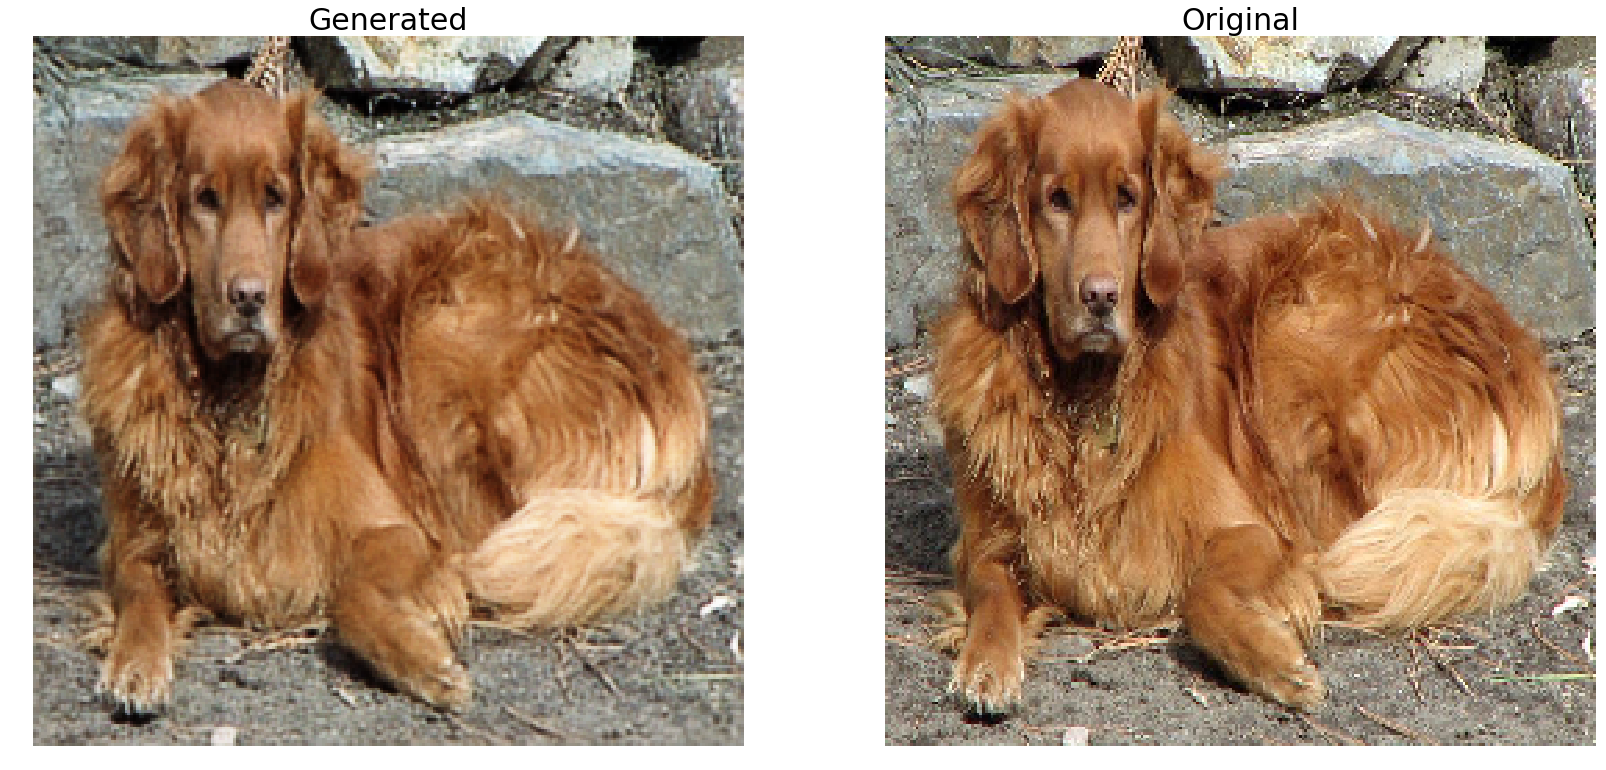

In [20]:
plt.figure(figsize=(28, 28))
plt.subplot(1, 2, 1)
plt.imshow(decoded_img.reshape(size, size, 3))
plt.title('Generated', fontsize=30)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(small_out)
plt.title('Original', fontsize=30)
plt.axis('off')
#plt.tight_layout()
plt.show()